In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Load datasets from Kaggle
resume_csv = "/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv"
job_csv = "/kaggle/input/jobs-and-job-description/job_title_des.csv"
df_resume = pd.read_csv(resume_csv)
df_job = pd.read_csv(job_csv)

# For training, use the resume dataset
# X: the resume text, y: the encoded category label for the resume
X = df_resume['Resume']
y = df_resume['Category']

# Create a pipeline:
# 1. TfidfVectorizer converts the resume text into numerical features.
# 2. SelectKBest with chi2 selects the top 1000 features (adjust k as needed).
# 3. LogisticRegression is our classifier.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('chi2', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Evaluate using 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Cross Validation Accuracy Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))


Cross Validation Accuracy Scores: [0.95854922 1.         0.97916667 1.         1.        ]
Mean Accuracy: 98.75%


In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions
y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Print precision, recall, and F1-score for each class
print(classification_report(y, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      0.90      0.95        20
                     Arts       1.00      1.00      1.00        36
       Automation Testing       1.00      0.77      0.87        26
               Blockchain       1.00      1.00      1.00        40
         Business Analyst       1.00      1.00      1.00        28
           Civil Engineer       1.00      1.00      1.00        24
             Data Science       1.00      1.00      1.00        40
                 Database       1.00      1.00      1.00        33
          DevOps Engineer       1.00      0.93      0.96        55
         DotNet Developer       0.97      1.00      0.98        28
            ETL Developer       1.00      1.00      1.00        40
   Electrical Engineering       1.00      1.00      1.00        30
                       HR       1.00      1.00      1.00        44
                   Hadoop       1.00      1.00      1.00     

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Print the classification report and confusion matrix
print("Test set performance:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test set performance:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00   

In [4]:
# Example candidate resumes (as strings)
weak_candidate = (
    "I am a recent high school graduate with basic skills in Microsoft Office. "
    "I have minimal work experience and have not completed any specialized training."
)

strong_candidate = (
    "I am an experienced Python Developer with 7 years in the industry. "
    "I have built scalable applications, implemented machine learning pipelines, "
    "and contributed to multiple high-impact projects that drove business growth."
)

edge_case_candidate = (
    "I have a diverse background that spans software development and data analysis. "
    "I have worked as a Java Developer and also contributed to data science projects, "
    "which makes my experience a blend of both engineering and analytical roles."
)

# List the candidate resumes
candidate_resumes = [weak_candidate, strong_candidate, edge_case_candidate]

# Generate predictions and prediction probabilities for each candidate
predicted_categories = pipeline.predict(candidate_resumes)
predicted_proba = pipeline.predict_proba(candidate_resumes)

# Display the results for each candidate
for i, resume in enumerate(candidate_resumes):
    print(f"Candidate {i+1}:")
    print("Resume Text:")
    print(resume)
    print("Predicted Category:", predicted_categories[i])
    print("Prediction Probabilities:")
    print(predicted_proba[i])
    print("-" * 80)


Candidate 1:
Resume Text:
I am a recent high school graduate with basic skills in Microsoft Office. I have minimal work experience and have not completed any specialized training.
Predicted Category: Python Developer
Prediction Probabilities:
[0.0348793  0.05227171 0.02950741 0.04013806 0.04084595 0.02565066
 0.04541077 0.03365181 0.03408291 0.02755445 0.03191191 0.03292491
 0.0594258  0.02810448 0.04653576 0.0620584  0.04959889 0.02701107
 0.04255702 0.03272156 0.06379185 0.02814335 0.03585003 0.06018843
 0.0351835 ]
--------------------------------------------------------------------------------
Candidate 2:
Resume Text:
I am an experienced Python Developer with 7 years in the industry. I have built scalable applications, implemented machine learning pipelines, and contributed to multiple high-impact projects that drove business growth.
Predicted Category: Data Science
Prediction Probabilities:
[0.02729005 0.03956616 0.02411767 0.04012183 0.04067537 0.02062978
 0.15812933 0.03091139 

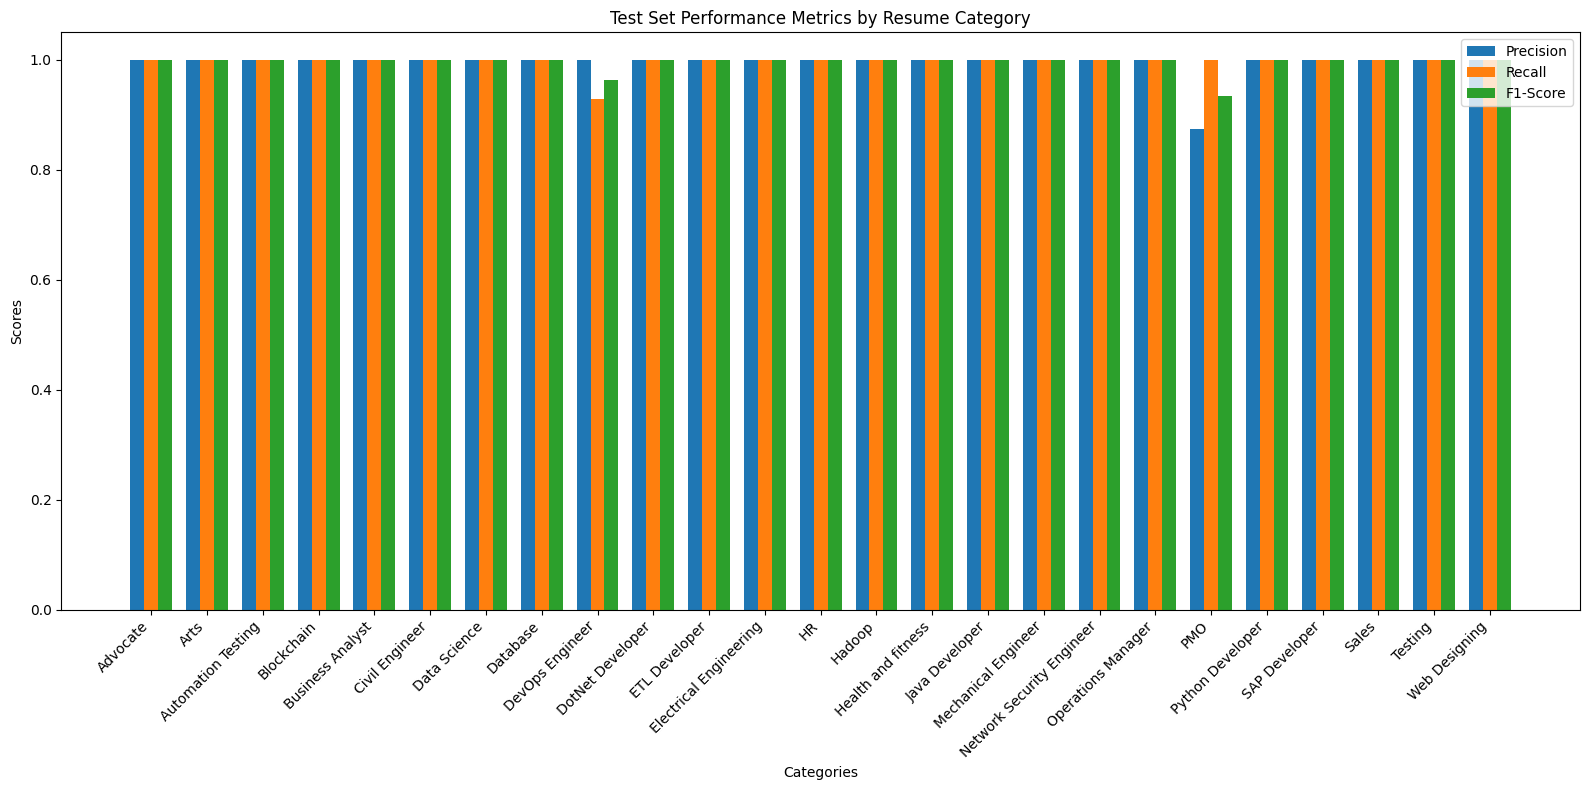

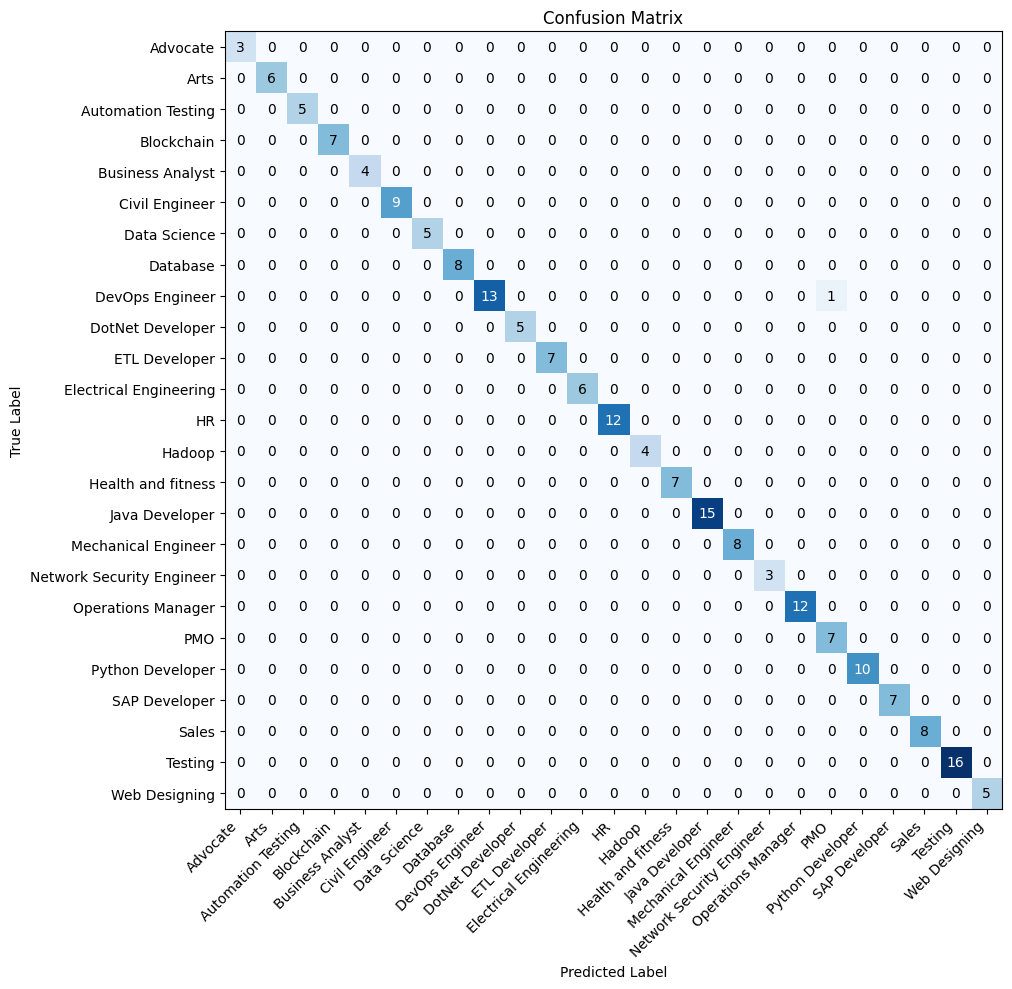

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have y_test and y_test_pred from your model evaluation:
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pipeline.fit(X_train, y_train)
# y_test_pred = pipeline.predict(X_test)

# Generate a classification report dictionary
report = classification_report(y_test, y_test_pred, output_dict=True)

# Get the category names (exclude overall metrics like 'accuracy', 'macro avg', etc.)
categories = [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each category
precision_vals = [report[cat]['precision'] for cat in categories]
recall_vals    = [report[cat]['recall'] for cat in categories]
f1_vals        = [report[cat]['f1-score'] for cat in categories]

# --- Graph 1: Grouped Bar Chart for Metrics ---
x = np.arange(len(categories))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(16,8))
bars1 = ax.bar(x - width, precision_vals, width, label='Precision')
bars2 = ax.bar(x, recall_vals, width, label='Recall')
bars3 = ax.bar(x + width, f1_vals, width, label='F1-Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Test Set Performance Metrics by Resume Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# --- Graph 2: Confusion Matrix Heatmap ---
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Use the same category order for ticks
ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_yticklabels(categories)

# Loop over data dimensions and add text annotations
for i in range(len(categories)):
    for j in range(len(categories)):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")

plt.tight_layout()
plt.show()


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_tfidf_match_percentage_ngram(resume_text, job_text):
    # Configure TF-IDF to consider unigrams and bigrams
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    docs = [resume_text, job_text]
    tfidf_matrix = vectorizer.fit_transform(docs)
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity * 100

# Test the updated function with your sample texts
sample_resume = """
I am an experienced Python Developer with expertise in machine learning, data analysis, 
and web development using Django and Flask. I have led multiple projects involving API development, 
data visualization, and automation.
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

tfidf_match_ngram = compute_tfidf_match_percentage_ngram(sample_resume, sample_job_desc)
print("TF-IDF (with n-grams) based Match Percentage: {:.2f}%".format(tfidf_match_ngram))



from sentence_transformers import SentenceTransformer, util

def compute_semantic_match_percentage(resume_text, job_text):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode([resume_text, job_text])
    similarity = util.cos_sim(embeddings[0], embeddings[1]).item()
    return similarity * 100

semantic_match = compute_semantic_match_percentage(sample_resume, sample_job_desc)
print("Semantic Similarity Match Percentage: {:.2f}%".format(semantic_match))



TF-IDF (with n-grams) based Match Percentage: 28.42%


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Semantic Similarity Match Percentage: 84.48%


In [4]:
def extract_noun_keywords(text):
    doc = nlp(text.lower())
    # Only include tokens that are NOUN or PROPN (ignore adjectives, verbs, etc.)
    return list(set(token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]))

def compute_skill_match_percentage_nouns(resume_text, job_text):
    resume_keywords = set(extract_noun_keywords(resume_text))
    job_keywords = set(extract_noun_keywords(job_text))
    if not job_keywords:
        return 0.0
    matched = resume_keywords.intersection(job_keywords)
    match_percentage = (len(matched) / len(job_keywords)) * 100
    return match_percentage, resume_keywords, job_keywords, matched

# Sample texts for testing:
sample_resume = """
I am an experienced Python Developer with expertise in machine learning, data analysis, 
and web development using Django and Flask. I have led multiple projects involving API development, 
data visualization, and automation.
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

match_pct, resume_nouns, job_nouns, matched_nouns = compute_skill_match_percentage_nouns(sample_resume, sample_job_desc)
print("Noun-based Match Percentage: {:.2f}%".format(match_pct))
print("Resume Nouns:", resume_nouns)
print("Job Description Nouns:", job_nouns)
print("Matched Nouns:", matched_nouns)


Noun-based Match Percentage: 70.59%
Resume Nouns: {'data', 'learning', 'flask', 'django', 'visualization', 'python', 'analysis', 'web', 'developer', 'expertise', 'api', 'development', 'automation', 'projects', 'machine'}
Job Description Nouns: {'data', 'django', 'flask', 'learning', 'candidate', 'design', 'python', 'analysis', 'web', 'developer', 'experience', 'proficient', 'development', 'api', 'automation', 'application', 'machine'}
Matched Nouns: {'data', 'learning', 'flask', 'django', 'python', 'analysis', 'web', 'developer', 'api', 'development', 'automation', 'machine'}


In [6]:
import spacy

# Make sure you have spacy and 'en_core_web_sm' installed:
# !pip install spacy
# !python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')

# 1. Extract single-word NOUN/PROPN lemmas
def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list(
        set(
            token.lemma_ 
            for token in doc 
            if token.pos_ in ["NOUN", "PROPN"]
        )
    )

# 2. Extract multi-word noun phrases (and optional ADJs) as phrases
def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        # Filter out trivial or stopword-only chunks
        if not all(tok.is_stop for tok in chunk):
            # Lemmatize tokens in chunk, including NOUN, PROPN, and ADJ
            chunk_lemmas = [
                token.lemma_ 
                for token in chunk 
                if token.pos_ in ["NOUN", "PROPN", "ADJ"]
            ]
            # Join them back into a phrase
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

# 3. Map synonyms or variants to canonical skill forms
SKILL_MAP = {
    # Example: different ways to say AWS
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    "application design": ["api design", "software design", "software architecture"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
    # Add more as needed
}

def normalize_skills(skill_set):
    """
    If a skill in skill_set matches any known variant in SKILL_MAP,
    we store the canonical form. Otherwise, we keep the skill as is.
    """
    normalized = set()
    for skill in skill_set:
        found = False
        for canonical_form, variants in SKILL_MAP.items():
            # Check if the skill string contains any variant
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

# 4. Weighted skill dictionary
#    Terms not listed here are effectively weight=1.0 if found.
skill_weights = {
    "python": 2.0,
    "javascript": 1.5,
    "aws": 2.5,
    "microservice architecture": 2.0,
    "docker container": 2.0,
    "application design": 1.5,
    "web application development": 2.0,
    "database": 1.5
    # add more as needed
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    """
    Computes a match percentage by summing the weights of matched skills
    over the sum of weights for all job skills.
    """
    total_weight = 0.0
    matched_weight = 0.0

    for skill in job_skills:
        # If the skill is recognized, use its weight; else default to 1.0
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight

    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100

# ---------- SAMPLE TEXTS: COMPLEX REAL-WORLD EXAMPLE ----------

sample_resume = """
John Smith is a Full-Stack Software Engineer with 6+ years of experience in designing and
developing scalable web applications and APIs. He has deep expertise in AWS environment,
Docker containers, and microservices architecture. John has led teams to migrate
legacy monoliths to a service-oriented approach using Kubernetes and CI/CD pipelines.
He is proficient in Python, Node.js, React, and has built robust data pipelines
for real-time analytics. Familiar with software architecture patterns such as MVC
and event-driven microservice-based designs.
"""

sample_job_desc = """
We are looking for a Senior Full-Stack Engineer who can drive application design for
high-traffic web applications. The ideal candidate must have a strong background in
web application development, microservice architecture, and container orchestration.
Experience working with AWS, Docker, and Kubernetes is highly desired. Proficiency
in Python, JavaScript, and modern frameworks (React, Vue, or Angular) is essential.
Candidates should also have experience with database design and an understanding of
API design best practices.
"""

# ---------- ANALYSIS PIPELINE ----------

# 1. Extract single-word and multi-word skills from both resume & JD
resume_nouns = extract_noun_keywords(sample_resume)
resume_phrases = extract_noun_phrases(sample_resume)
job_nouns = extract_noun_keywords(sample_job_desc)
job_phrases = extract_noun_phrases(sample_job_desc)

# 2. Combine them or choose one approach
#    Let's combine single-word nouns + noun phrases into one skill set
resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 3. Normalize the skill sets by mapping synonyms to canonical forms
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 4. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 5. Identify missing skills for clarity
missing_skills = normalized_job_skills - normalized_resume_skills

print("----- Resume Skills (Normalized) -----")
print(normalized_resume_skills)
print("\n----- Job Skills (Normalized) -----")
print(normalized_job_skills)

print("\nWeighted Skill Match Percentage: {:.2f}%".format(match_pct))

print("\nMissing Skills:")
for skill in missing_skills:
    print("-", skill)


----- Resume Skills (Normalized) -----
{'team', 'web', 'docker container', 'service', 'experience', 'engineer', 'full stack software engineer', 'microservice', 'ci cd pipeline', 'software', 'stack', 'year', 'mvc event microservice design', 'application design', 'aws', 'john', 'john smith', 'deep expertise', 'event', 'pattern', 'application', 'analytic', 'real time analytic', 'monolith', 'environment', 'time', 'design', 'pipeline', 'smith', 'service approach', 'expertise', 'architecture', 'kubernete', 'designing', 'cd', 'legacy', 'mvc', 'approach', 'python', 'apis', 'container', 'datum', 'ci', 'legacy monolith', 'scalable web application', 'robust datum pipeline'}

----- Job Skills (Normalized) -----
{'microservice architecture', 'modern framework', 'practice', 'database', 'database design', 'web', 'docker container', 'experience', 'engineer', 'microservice', 'stack', 'candidate', 'senior full stack engineer', 'application design', 'aws', 'api', 'development', 'understanding', 'web appl

In [7]:
import spacy

# Make sure you have spacy and 'en_core_web_sm' installed:
# !pip install spacy
# !python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')

# 1. Extract single-word NOUN/PROPN lemmas
def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list(
        set(
            token.lemma_ 
            for token in doc 
            if token.pos_ in ["NOUN", "PROPN"]
        )
    )

# 2. Extract multi-word noun phrases (and optional ADJs) as phrases
def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        # Filter out trivial or stopword-only chunks
        if not all(tok.is_stop for tok in chunk):
            # Lemmatize tokens in chunk, including NOUN, PROPN, and ADJ
            chunk_lemmas = [
                token.lemma_ 
                for token in chunk 
                if token.pos_ in ["NOUN", "PROPN", "ADJ"]
            ]
            # Join them back into a phrase
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

# 3. Map synonyms or variants to canonical skill forms
SKILL_MAP = {
    # Example: different ways to say AWS
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    "application design": ["api design", "software design", "software architecture"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
    # Add more as needed
}

def normalize_skills(skill_set):
    """
    If a skill in skill_set matches any known variant in SKILL_MAP,
    we store the canonical form. Otherwise, we keep the skill as is.
    """
    normalized = set()
    for skill in skill_set:
        found = False
        for canonical_form, variants in SKILL_MAP.items():
            # Check if the skill string contains any variant
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

# 4. Weighted skill dictionary
#    Terms not listed here are effectively weight=1.0 if found.
skill_weights = {
    "python": 2.0,
    "javascript": 1.5,
    "aws": 2.5,
    "microservice architecture": 2.0,
    "docker container": 2.0,
    "application design": 1.5,
    "web application development": 2.0,
    "database": 1.5
    # add more as needed
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    """
    Computes a match percentage by summing the weights of matched skills
    over the sum of weights for all job skills.
    """
    total_weight = 0.0
    matched_weight = 0.0

    for skill in job_skills:
        # If the skill is recognized, use its weight; else default to 1.0
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight

    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100

# ---------- SAMPLE TEXTS: COMPLEX REAL-WORLD EXAMPLE ----------


sample_resume = """
I am an experienced Python Developer with expertise in machine learning, data analysis, 
and web development using Django and Flask. I have led multiple projects involving API development, 
data visualization, and automation.
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

# ---------- ANALYSIS PIPELINE ----------

# 1. Extract single-word and multi-word skills from both resume & JD
resume_nouns = extract_noun_keywords(sample_resume)
resume_phrases = extract_noun_phrases(sample_resume)
job_nouns = extract_noun_keywords(sample_job_desc)
job_phrases = extract_noun_phrases(sample_job_desc)

# 2. Combine them or choose one approach
#    Let's combine single-word nouns + noun phrases into one skill set
resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 3. Normalize the skill sets by mapping synonyms to canonical forms
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 4. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 5. Identify missing skills for clarity
missing_skills = normalized_job_skills - normalized_resume_skills

print("----- Resume Skills (Normalized) -----")
print(normalized_resume_skills)
print("\n----- Job Skills (Normalized) -----")
print(normalized_job_skills)

print("\nWeighted Skill Match Percentage: {:.2f}%".format(match_pct))

print("\nMissing Skills:")
for skill in missing_skills:
    print("-", skill)


----- Resume Skills (Normalized) -----
{'data', 'visualization', 'web', 'multiple project', 'data analysis', 'api', 'development', 'web application development', 'learning', 'flask', 'datum visualization', 'analysis', 'expertise', 'experienced python developer', 'machine', 'django', 'api development', 'python', 'developer', 'project', 'datum', 'machine learning', 'automation'}

----- Job Skills (Normalized) -----
{'data', 'web', 'experience', 'candidate', 'data analysis', 'application design', 'api', 'development', 'web application development', 'application', 'learning', 'flask', 'design', 'analysis', 'ideal candidate', 'python developer proficient', 'machine', 'django', 'python', 'developer', 'machine learning', 'proficient', 'automation'}

Weighted Skill Match Percentage: 66.67%

Missing Skills:
- candidate
- design
- ideal candidate
- application design
- experience
- python developer proficient
- proficient
- application


In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Define a set of buzzwords to ignore anywhere they appear
BUZZWORDS = {
    "candidate", 
    "ideal candidate", 
    "experience", 
    "proficient",
    "application",
    "proficiency", 
    "expert", 
    "expertise", 
    "looking",
    "seek", 
    "opportunity", 
    "requirement"
}

def should_ignore_skill(skill):
    """
    Return True if the entire skill is in BUZZWORDS
    OR if it contains any buzzword as a substring.
    """
    lower_skill = skill.lower()
    if lower_skill in BUZZWORDS:
        return True
    for buzz in BUZZWORDS:
        if buzz in lower_skill:  # e.g. skill='python developer proficient'
            return True
    return False

def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list({
        token.lemma_ 
        for token in doc 
        if token.pos_ in ["NOUN", "PROPN"]
    })

def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        if not all(tok.is_stop for tok in chunk):
            chunk_lemmas = [token.lemma_ for token in chunk if token.pos_ in ["NOUN", "PROPN", "ADJ"]]
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

# Skill map for synonyms
SKILL_MAP = {
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    # Combine "api design" and "api development" under "application design"
    "application design": ["api design", "software design", "software architecture", "api development"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
}

def normalize_skills(skill_set):
    normalized = set()
    for skill in skill_set:
        found = False
        # If skill includes a buzzword, skip it entirely
        if should_ignore_skill(skill):
            continue
        for canonical_form, variants in SKILL_MAP.items():
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

# Weighted dictionary
skill_weights = {
    "python": 2.5,
    "django": 2.0,
    "flask": 2.0,
    "machine learning": 2.0,
    "application design": 1.5,
    "web application development": 2.0,
    # ...
    # Others default to 1.0
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    total_weight = 0.0
    matched_weight = 0.0
    for skill in job_skills:
        # If the skill is recognized, use its weight; else default = 1.0
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight
    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100

# ------------ SAMPLE DATA ------------
sample_resume = """
I am an experienced Python Developer with expertise in machine learning, data analysis, 
and web development using Django and Flask. I have led multiple projects involving API development, 
data visualization, and automation.
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

# 1. Extract from resume & job
resume_nouns = extract_noun_keywords(sample_resume)
resume_phrases = extract_noun_phrases(sample_resume)
job_nouns = extract_noun_keywords(sample_job_desc)
job_phrases = extract_noun_phrases(sample_job_desc)

resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 2. Normalize (maps synonyms, removes buzzword phrases)
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 3. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 4. Missing Skills
missing_skills = {
    skill for skill in normalized_job_skills
    if skill not in normalized_resume_skills
}

# 5. Show results
print("Resume Skills (Normalized):", normalized_resume_skills)
print("Job Skills (Normalized):", normalized_job_skills)
print(f"\nWeighted Skill Match Percentage: {match_pct:.2f}%")
print("\nMissing Skills (excluding buzzwords):")
for skill in missing_skills:
    print("-", skill)


Resume Skills (Normalized): {'data', 'visualization', 'web', 'multiple project', 'data analysis', 'application design', 'api', 'development', 'web application development', 'learning', 'flask', 'datum visualization', 'analysis', 'machine', 'django', 'python', 'developer', 'project', 'datum', 'machine learning', 'automation'}
Job Skills (Normalized): {'data', 'learning', 'flask', 'django', 'design', 'analysis', 'python', 'web', 'application design', 'data analysis', 'developer', 'machine learning', 'api', 'development', 'automation', 'machine'}

Weighted Skill Match Percentage: 95.24%

Missing Skills (excluding buzzwords):
- design


In [12]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Define a set of buzzwords to ignore
BUZZWORDS = {
    "candidate", 
    "ideal candidate", 
    "experience", 
    "proficient",
    "application",
    "proficiency", 
    "expert", 
    "expertise", 
    "looking",
    "seek", 
    "opportunity", 
    "requirement"
}

def should_ignore_skill(skill):
    lower_skill = skill.lower()
    if lower_skill in BUZZWORDS:
        return True
    for buzz in BUZZWORDS:
        if buzz in lower_skill:
            return True
    return False

def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list({
        token.lemma_ 
        for token in doc 
        if token.pos_ in ["NOUN", "PROPN"]
    })

def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        if not all(tok.is_stop for tok in chunk):
            chunk_lemmas = [
                token.lemma_ 
                for token in chunk 
                if token.pos_ in ["NOUN", "PROPN", "ADJ"]
            ]
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

# Skill map for synonyms
SKILL_MAP = {
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    "application design": ["api design", "software design", "software architecture", "api development"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
}

def normalize_skills(skill_set):
    normalized = set()
    for skill in skill_set:
        if should_ignore_skill(skill):
            continue
        found = False
        for canonical_form, variants in SKILL_MAP.items():
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

# Weighted dictionary
skill_weights = {
    "python": 2.5,
    "django": 2.0,
    "flask": 2.0,
    "machine learning": 2.0,
    "application design": 1.5,
    "web application development": 2.0,
    # ...
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    total_weight = 0.0
    matched_weight = 0.0
    for skill in job_skills:
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight
    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100

# ------------ SAMPLE WEAK RESUME ------------
weak_resume = """
I recently graduated with a degree in Information Technology. 
I have used Python briefly for a university project and know some basic HTML and CSS. 
I have mostly worked part-time in a local business handling basic administrative tasks. 
I have some exposure to online tools and a desire to learn more about web apps. 
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

# 1. Extract from resume & job
resume_nouns = extract_noun_keywords(weak_resume)
resume_phrases = extract_noun_phrases(weak_resume)
job_nouns = extract_noun_keywords(sample_job_desc)
job_phrases = extract_noun_phrases(sample_job_desc)

resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 2. Normalize (maps synonyms, removes buzzword phrases)
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 3. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 4. Missing Skills
missing_skills = {
    skill for skill in normalized_job_skills
    if skill not in normalized_resume_skills
}

print("----- Resume Skills (Normalized) -----")
print(normalized_resume_skills)
print("\n----- Job Skills (Normalized) -----")
print(normalized_job_skills)
print(f"\nWeighted Skill Match Percentage: {match_pct:.2f}%")

print("\nMissing Skills (excluding buzzwords):")
for skill in missing_skills:
    print("-", skill)


----- Resume Skills (Normalized) -----
{'web', 'tool', 'css', 'local business', 'exposure', 'desire', 'basic html', 'task', 'information technology', 'online tool', 'information', 'university', 'html', 'part', 'time', 'web app', 'app', 'business', 'degree', 'technology', 'university project', 'python', 'basic administrative task', 'project'}

----- Job Skills (Normalized) -----
{'data', 'learning', 'flask', 'django', 'design', 'analysis', 'python', 'web', 'application design', 'data analysis', 'developer', 'machine learning', 'api', 'development', 'automation', 'machine'}

Weighted Skill Match Percentage: 16.67%

Missing Skills (excluding buzzwords):
- data
- learning
- flask
- django
- design
- analysis
- data analysis
- application design
- developer
- machine learning
- api
- development
- automation
- machine


In [13]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Define a set of buzzwords to ignore
BUZZWORDS = {
    "candidate", 
    "ideal candidate", 
    "experience", 
    "proficient",
    "application",
    "proficiency", 
    "expert", 
    "expertise", 
    "looking",
    "seek", 
    "opportunity", 
    "requirement"
}

def should_ignore_skill(skill):
    lower_skill = skill.lower()
    if lower_skill in BUZZWORDS:
        return True
    for buzz in BUZZWORDS:
        if buzz in lower_skill:
            return True
    return False

def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list({
        token.lemma_ 
        for token in doc 
        if token.pos_ in ["NOUN", "PROPN"]
    })

def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        if not all(tok.is_stop for tok in chunk):
            chunk_lemmas = [
                token.lemma_ 
                for token in chunk 
                if token.pos_ in ["NOUN", "PROPN", "ADJ"]
            ]
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

SKILL_MAP = {
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    "application design": ["api design", "software design", "software architecture", "api development"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
}

def normalize_skills(skill_set):
    normalized = set()
    for skill in skill_set:
        if should_ignore_skill(skill):
            continue
        found = False
        for canonical_form, variants in SKILL_MAP.items():
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

skill_weights = {
    "python": 2.5,
    "django": 2.0,
    "flask": 2.0,
    "machine learning": 2.0,
    "application design": 1.5,
    "web application development": 2.0,
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    total_weight = 0.0
    matched_weight = 0.0
    for skill in job_skills:
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight
    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100


# ------------ SAMPLE ENGLISH TEACHER RESUME ------------
english_teacher_resume = """
I am a dedicated English Literature graduate looking to become a high school English teacher.
I have 3 years of experience tutoring students in grammar, essay writing, and reading comprehension.
I love designing creative lesson plans and organizing writing workshops. Additionally, I have
volunteered as a teacher's aide, helping students improve their vocabulary and critical thinking skills.
"""

sample_job_desc = """
We are seeking a Python Developer proficient in Django and Flask. The ideal candidate should have 
experience in machine learning, data analysis, and web application development. Experience in API design 
and automation is highly desired.
"""

# 1. Extract from resume & job
resume_nouns = extract_noun_keywords(english_teacher_resume)
resume_phrases = extract_noun_phrases(english_teacher_resume)
job_nouns = extract_noun_keywords(sample_job_desc)
job_phrases = extract_noun_phrases(sample_job_desc)

resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 2. Normalize (maps synonyms, removes buzzword phrases)
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 3. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 4. Missing Skills
missing_skills = {
    skill for skill in normalized_job_skills
    if skill not in normalized_resume_skills
}

print("----- Resume Skills (Normalized) -----")
print(normalized_resume_skills)
print("\n----- Job Skills (Normalized) -----")
print(normalized_job_skills)
print(f"\nWeighted Skill Match Percentage: {match_pct:.2f}%")

print("\nMissing Skills (excluding buzzwords):")
for skill in missing_skills:
    print("-", skill)


----- Resume Skills (Normalized) -----
{'teacher aide', 'writing workshop', 'plan', 'skill', 'school', 'essay writing', 'workshop', 'high school english teacher', 'year', 'aide', 'lesson', 'comprehension', 'literature', 'dedicated english literature graduate', 'student', 'writing', 'creative lesson plan', 'teacher', 'thinking', 'tutoring', 'vocabulary critical thinking skill', 'grammar', 'graduate'}

----- Job Skills (Normalized) -----
{'data', 'learning', 'flask', 'django', 'design', 'analysis', 'python', 'web', 'application design', 'data analysis', 'developer', 'machine learning', 'api', 'development', 'automation', 'machine'}

Weighted Skill Match Percentage: 0.00%

Missing Skills (excluding buzzwords):
- data
- learning
- flask
- django
- design
- analysis
- python
- web
- application design
- data analysis
- developer
- machine learning
- api
- development
- automation
- machine


In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Define a set of buzzwords to ignore
BUZZWORDS = {
    "candidate", 
    "ideal candidate", 
    "experience", 
    "proficient",
    "application",
    "proficiency", 
    "expert", 
    "expertise", 
    "looking",
    "seek", 
    "opportunity", 
    "requirement"
}

def should_ignore_skill(skill):
    lower_skill = skill.lower()
    if lower_skill in BUZZWORDS:
        return True
    for buzz in BUZZWORDS:
        if buzz in lower_skill:
            return True
    return False

def extract_noun_keywords(text):
    doc = nlp(text.lower())
    return list({
        token.lemma_
        for token in doc
        if token.pos_ in ["NOUN", "PROPN"]
    })

def extract_noun_phrases(text):
    doc = nlp(text.lower())
    phrases = set()
    for chunk in doc.noun_chunks:
        if not all(tok.is_stop for tok in chunk):
            chunk_lemmas = [
                token.lemma_ 
                for token in chunk 
                if token.pos_ in ["NOUN", "PROPN", "ADJ"]
            ]
            phrase = " ".join(chunk_lemmas)
            if phrase:
                phrases.add(phrase)
    return list(phrases)

# Skill map for synonyms (currently geared toward the developer job, 
# but we'll leave it in for demonstration)
SKILL_MAP = {
    "aws": ["amazon web services", "amazon cloud", "aws environment"],
    "application design": ["api design", "software design", "software architecture", "api development"],
    "web application development": ["web dev", "web development", "web applications", "frontend backend"],
    "microservice architecture": ["microservices", "microservice-based", "service-oriented"],
    "docker container": ["container orchestration", "docker", "containers", "kubernetes", "k8s"],
}

def normalize_skills(skill_set):
    normalized = set()
    for skill in skill_set:
        if should_ignore_skill(skill):
            continue
        found = False
        for canonical_form, variants in SKILL_MAP.items():
            if any(variant in skill for variant in variants):
                normalized.add(canonical_form)
                found = True
                break
        if not found:
            normalized.add(skill)
    return normalized

# Weighted dictionary – now we'll add some teacher-related skills
skill_weights = {
    "lesson plan": 2.0,
    "english": 2.0,
    "grammar": 2.0,
    "literature": 1.5,
    "writing": 1.5,
    "vocabulary": 1.5,
    "teacher": 2.0,
    "classroom": 1.5,
    "critical thinking": 1.5,
    "python": 0.5,  # Keep for demonstration, but less important here
    # ... more if needed
}

def compute_weighted_match_percentage(resume_skills, job_skills):
    total_weight = 0.0
    matched_weight = 0.0
    for skill in job_skills:
        weight = skill_weights.get(skill, 1.0)
        total_weight += weight
        if skill in resume_skills:
            matched_weight += weight
    if total_weight == 0:
        return 0.0
    return (matched_weight / total_weight) * 100


# ------------ SAMPLE ENGLISH TEACHER RESUME ------------
english_teacher_resume = """
I am a dedicated English Literature graduate looking to become a high school English teacher.
I have 3 years of experience tutoring students in grammar, essay writing, and reading comprehension.
I love designing creative lesson plans and organizing writing workshops. Additionally, I have
volunteered as a teacher's aide, helping students improve their vocabulary and critical thinking skills.
"""

# ------------ MATCHING JOB DESCRIPTION FOR AN ENGLISH TEACHER ------------
teacher_job_desc = """
We are seeking a passionate English Teacher to lead classroom activities focused on reading comprehension,
grammar, and essay writing. The ideal teacher will design engaging lesson plans, promote literature appreciation,
and encourage students to develop strong vocabulary and critical thinking. Previous tutoring or classroom experience
is highly desired. 
"""

# 1. Extract from resume & job
resume_nouns = extract_noun_keywords(english_teacher_resume)
resume_phrases = extract_noun_phrases(english_teacher_resume)
job_nouns = extract_noun_keywords(teacher_job_desc)
job_phrases = extract_noun_phrases(teacher_job_desc)

resume_combined = set(resume_nouns + resume_phrases)
job_combined = set(job_nouns + job_phrases)

# 2. Normalize (maps synonyms, removes buzzword phrases)
normalized_resume_skills = normalize_skills(resume_combined)
normalized_job_skills = normalize_skills(job_combined)

# 3. Compute Weighted Match
match_pct = compute_weighted_match_percentage(normalized_resume_skills, normalized_job_skills)

# 4. Missing Skills
missing_skills = {
    skill for skill in normalized_job_skills
    if skill not in normalized_resume_skills
}

print("----- Resume Skills (Normalized) -----")
print(normalized_resume_skills)
print("\n----- Job Skills (Normalized) -----")
print(normalized_job_skills)
print(f"\nWeighted Skill Match Percentage: {match_pct:.2f}%")

print("\nMissing Skills (excluding buzzwords):")
for skill in missing_skills:
    print("-", skill)


----- Resume Skills (Normalized) -----
{'teacher aide', 'writing workshop', 'plan', 'skill', 'school', 'essay writing', 'workshop', 'high school english teacher', 'year', 'aide', 'lesson', 'comprehension', 'literature', 'dedicated english literature graduate', 'student', 'writing', 'creative lesson plan', 'teacher', 'thinking', 'tutoring', 'vocabulary critical thinking skill', 'grammar', 'graduate'}

----- Job Skills (Normalized) -----
{'classroom activity', 'plan', 'literature appreciation', 'lesson', 'engaging lesson plan', 'ideal teacher', 'comprehension', 'literature', 'appreciation', 'student', 'writing', 'teacher', 'thinking', 'tutoring', 'activity', 'passionate english teacher', 'classroom', 'grammar', 'strong vocabulary critical thinking'}

Weighted Skill Match Percentage: 57.78%

Missing Skills (excluding buzzwords):
- classroom activity
- activity
- literature appreciation
- passionate english teacher
- classroom
- engaging lesson plan
- ideal teacher
- appreciation
- strong 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load datasets from Kaggle
resume_csv = "/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv"
job_csv = "/kaggle/input/jobs-and-job-description/job_title_des.csv"
df_resume = pd.read_csv(resume_csv)
df_job = pd.read_csv(job_csv)

# For training, use the resume dataset
X = df_resume['Resume']
y = df_resume['Category']

# Create a pipeline:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('chi2', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Evaluate using 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross Validation Accuracy Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))

# Also print classification report
y_pred = cross_val_predict(pipeline, X, y, cv=5)
print(classification_report(y, y_pred))

# Fit the pipeline on the full dataset so we can predict new resumes
pipeline.fit(X, y)

# Example candidate resumes (as strings)
weak_candidate = (
    "I am a recent high school graduate with basic skills in Microsoft Office. "
    "I have minimal work experience and have not completed any specialized training."
)

strong_candidate = (
    "I am an experienced Python Developer with 7 years in the industry. "
    "I have built scalable applications, implemented machine learning pipelines, "
    "and contributed to multiple high-impact projects that drove business growth."
)

edge_case_candidate = (
    "I have a diverse background that spans software development and data analysis. "
    "I have worked as a Java Developer and also contributed to data science projects, "
    "which makes my experience a blend of both engineering and analytical roles."
)

candidate_resumes = [weak_candidate, strong_candidate, edge_case_candidate]

# Predict categories & probabilities
predicted_categories = pipeline.predict(candidate_resumes)
predicted_proba = pipeline.predict_proba(candidate_resumes)

classes = pipeline.named_steps['clf'].classes_  # all possible classes (labels)

for i, resume in enumerate(candidate_resumes):
    print(f"\nCandidate {i+1} Resume Text:")
    print(resume)
    
    # Single best-predicted category
    print("\nPredicted Category:", predicted_categories[i])
    
    # Sort probabilities in descending order
    sorted_indices = np.argsort(-predicted_proba[i])  # negative sign for descending
    print("\nCategory Probabilities (sorted):")
    
    # Show all classes or limit to top N
    # e.g., top_n = 3
    # for j in sorted_indices[:top_n]:
    for j in sorted_indices:
        cat_name = classes[j]
        prob_value = predicted_proba[i][j] * 100
        print(f"  {cat_name}: {prob_value:.2f}%")
        
    print("-" * 80)


Cross Validation Accuracy Scores: [0.95854922 1.         0.97916667 1.         1.        ]
Mean Accuracy: 98.75%
                           precision    recall  f1-score   support

                 Advocate       1.00      0.90      0.95        20
                     Arts       1.00      1.00      1.00        36
       Automation Testing       1.00      0.77      0.87        26
               Blockchain       1.00      1.00      1.00        40
         Business Analyst       1.00      1.00      1.00        28
           Civil Engineer       1.00      1.00      1.00        24
             Data Science       1.00      1.00      1.00        40
                 Database       1.00      1.00      1.00        33
          DevOps Engineer       1.00      0.93      0.96        55
         DotNet Developer       0.97      1.00      0.98        28
            ETL Developer       1.00      1.00      1.00        40
   Electrical Engineering       1.00      1.00      1.00        30
               